<a href="https://colab.research.google.com/github/lenaphamthi/bai_tap_thong_ke/blob/main/XSTK_ULTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Khai báo các thư viện cần thiết
import numpy as np
from scipy import stats
from math import sqrt

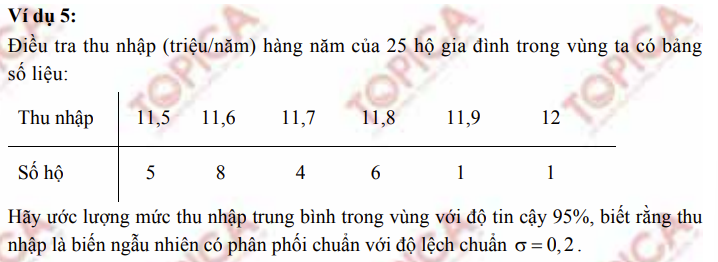

In [2]:
# Xây dựng hàm ước lượng khi đã biết độ lệch chuẩn tổng thể:
def norm_interval(data, alpha, std, type_interval = "two"):
  mean = np.mean(data)
  if type_interval == "two":
    z = - stats.norm.ppf((1 - alpha) /2)
    m = mean - z * (std/sqrt(len(data)))
    n = mean + z * (std/sqrt(len(data)))
    return m, n
  elif type_interval == "lower":
    z = - stats.norm.ppf(1 - alpha)
    return mean - z * (std/sqrt(len(data)))
  else:
    z = - stats.norm.ppf(1 - alpha)
    return mean + z * (std/sqrt(len(data)))

In [3]:
data = [11.5, 11.5, 11.5, 11.5, 11.5,
        11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6,
        11.7, 11.7, 11.7, 11.7,
        11.8, 11.8, 11.8, 11.8, 11.8, 11.8,
        11.9,
        12]
norm_interval(data, 0.95, 0.2)

(11.593601440618396, 11.750398559381601)

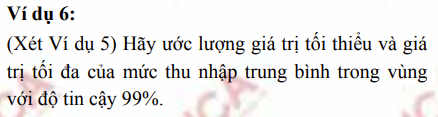

In [4]:
print("Ước lượng tối thiểu với độ tin cậy 99%: ",
      norm_interval(data, 0.99, 0.2, type_interval="lower"))
print("Ước lượng tối đa với độ tin cậy 99%: ",
      norm_interval(data, 0.99, 0.2, type_interval="upper"))

Ước lượng tối thiểu với độ tin cậy 99%:  11.578946085038366
Ước lượng tối đa với độ tin cậy 99%:  11.765053914961632


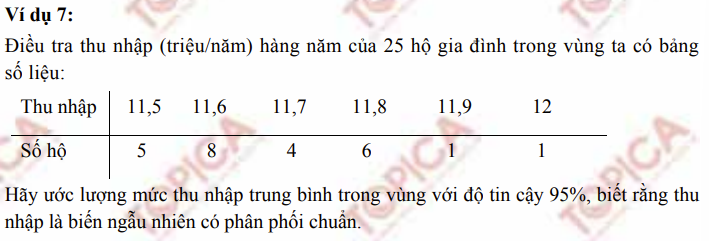

In [5]:
stats.t.interval(alpha = 0.95, df = 25 - 1, 
                 loc = np.mean(data), scale = stats.sem(data))

(11.615452694676348, 11.72854730532365)

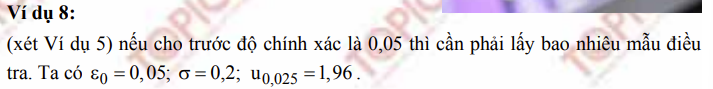

In [6]:
z = - stats.norm.ppf((1 - 0.95)/ 2)
e = 0.05
std = 0.2
print("Mẫu tối thiểu cần phải lấy là :", int((z/e * std)**2)+1)

Mẫu tối thiểu cần phải lấy là : 62


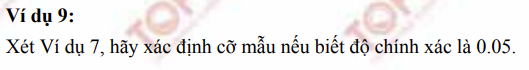

In [7]:
t = - stats.t.ppf((1 - 0.95)/ 2, df = 25 - 1)
e = 0.05
std = np.std(data, ddof = 1)
print("Mẫu tối thiểu cần phải lấy là :", int((t/e * std)**2)+1)

Mẫu tối thiểu cần phải lấy là : 32


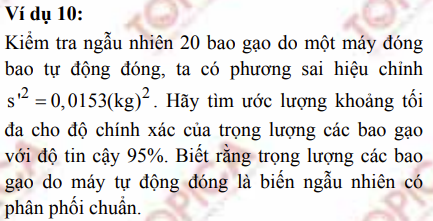

In [8]:
var = 0.0153
df = 20 - 1
chi2 = stats.chi2.ppf(1 - 0.95, df)
print("Ước lượng tối đa cho độ chính xăc: ",
      (var * df) / chi2)

Ước lượng tối đa cho độ chính xăc:  0.02873377726855627


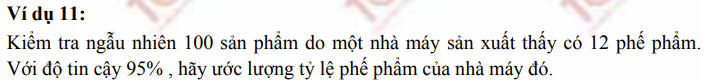

In [9]:
def proportion_interval(n, m, alpha):
  f = m / n
  z = - stats.norm.ppf((1 - alpha) / 2)
  x = f - sqrt(f * (1-f)) / sqrt(n) * z
  y = f + sqrt(f * (1-f)) / sqrt(n) * z
  return x, y

In [10]:
proportion_interval(n = 100, m = 12, alpha = 0.95)

(0.05630870927157311, 0.18369129072842688)